In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import model_selection, metrics
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
import seaborn as sns
import math
import keras
from time import time
import glob
from keras.callbacks import TensorBoard


import os
print(os.listdir("."))

/home/lazukav/anaconda3/lib/python3.5/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
Using TensorFlow backend.


['.ipynb_checkpoints', 'mnist_submit-Copy3.ipynb', 'model2.csv', 'test.csv', 'train.csv', 'mnist_submit-Copy2.ipynb', 'Untitled1.ipynb', 'model0.csv', 'model1.csv', 'mnist_submit.ipynb', 'EDA.ipynb', 'Untitled.ipynb']


In [2]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

In [3]:
def load_data(train_path='train.csv', test_path='test.csv'):
    train = pd.DataFrame.from_csv(train_path, index_col=None)
    test = pd.DataFrame.from_csv(test_path, index_col=None)
              
    return train, test

In [4]:
train, test = load_data()

/home/lazukav/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  
/home/lazukav/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
train_X = train.drop("label", axis=1)
train_y = train["label"]

In [6]:
train_X.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0  0       0       0       0       0       0       0       0       0        
1  0       0       0       0       0       0       0       0       0        
2  0       0       0       0       0       0       0       0       0        
3  0       0       0       0       0       0       0       0       0        
4  0       0       0       0       0       0       0       0       0        

   pixel9  pixel10  pixel11  pixel12  pixel13  pixel14  pixel15  pixel16  \
0  0       0        0        0        0        0        0        0         
1  0       0        0        0        0        0        0        0         
2  0       0        0        0        0        0        0        0         
3  0       0        0        0        0        0        0        0         
4  0       0        0        0        0        0        0        0         

   pixel17  pixel18  pixel19  pixel20  pixel21  pixel22  pixel23  pixel24  \
0  0        0        0        0        0        0        0        0         
1  0        0        0        0        0        0        0        0         
2  0        0        0        0        0        0        0        0         
3  0        0        0        0        0        0        0        0         
4  0        0        0        0        0        0        0        0         

   pixel25  pixel26  pixel27  pixel28  pixel29  pixel30  pixel31  pixel32  \
0  0        0        0        0        0        0        0        0         
1  0        0        0        0        0        0        0        0         
2  0        0        0        0        0        0        0        0         
3  0        0        0        0        0        0        0        0         
4  0        0        0        0        0        0        0        0         

   pixel33  pixel34  pixel35  pixel36  pixel37  pixel38  pixel39  pixel40  \
0  0        0        0        0        0        0        0        0         
1  0        0        0        0        0        0        0        0         
2  0        0        0        0        0        0        0        0         
3  0        0        0        0        0        0        0        0         
4  0        0        0        0        0        0        0        0         

   pixel41  pixel42  pixel43  pixel44  pixel45  pixel46  pixel47  pixel48  \
0  0        0        0        0        0        0        0        0         
1  0        0        0        0        0        0        0        0         
2  0        0        0        0        0        0        0        0         
3  0        0        0        0        0        0        0        0         
4  0        0        0        0        0        0        0        0         

   pixel49  pixel50  pixel51  pixel52  pixel53  pixel54  pixel55  pixel56  \
0  0        0        0        0        0        0        0        0         
1  0        0        0        0        0        0        0        0         
2  0        0        0        0        0        0        0        0         
3  0        0        0        0        0        0        0        0         
4  0        0        0        0        0        0        0        0         

   pixel57  pixel58  pixel59  pixel60  pixel61  pixel62  pixel63  pixel64  \
0  0        0        0        0        0        0        0        0         
1  0        0        0        0        0        0        0        0         
2  0        0        0        0        0        0        0        0         
3  0        0        0        0        0        0        0        0         
4  0        0        0        0        0        0        0        0         

   pixel65  pixel66  pixel67  pixel68  pixel69  pixel70  pixel71  pixel72  \
0  0        0        0        0        0        0        0        0         
1  0        0        0        0        0        0        0        0         
2  0        0        0        0        0        0        0        0       

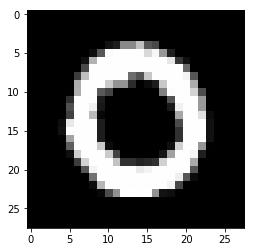

In [7]:
plt.imshow(train_X.iloc[1].values.reshape((28, 28)), cmap='gray')
plt.show()

In [8]:
train_X.iloc[1].unique()

array([  0,  18,  30, 137, 192,  86,  72,   1,  13, 250, 254, 217, 246,
       151,  32,  16, 179, 231,  54,  15, 104,  61, 191, 109,  83, 199,
       243,  85, 172, 202, 147,  45,  11,  29, 200, 171, 174,  89,  67,
       128, 252, 212,  76,  47, 153,  80, 240,  24,  25,  64, 186,   7,
       166, 224,  12,  14, 232,  75,  17,  48,   2, 163,  94, 209, 150,
       206,  66,  21, 161, 245,  31,  60, 194,  34,  41, 233, 114, 239,
       182,  70,   8, 146, 255,  19])

In [9]:
train_X = train_X.div(255, axis=0).fillna(0)
test = test.div(255, axis=0).fillna(0)

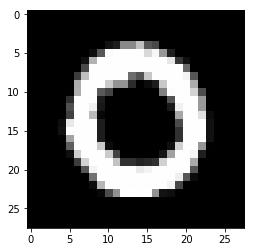

In [10]:
plt.imshow(train_X.iloc[1].values.reshape((28,28)), cmap='gray')
plt.show()

In [11]:
train_X.iloc[1].unique()

array([0.        , 0.07058824, 0.11764706, 0.5372549 , 0.75294118,
       0.3372549 , 0.28235294, 0.00392157, 0.05098039, 0.98039216,
       0.99607843, 0.85098039, 0.96470588, 0.59215686, 0.1254902 ,
       0.0627451 , 0.70196078, 0.90588235, 0.21176471, 0.05882353,
       0.40784314, 0.23921569, 0.74901961, 0.42745098, 0.3254902 ,
       0.78039216, 0.95294118, 0.33333333, 0.6745098 , 0.79215686,
       0.57647059, 0.17647059, 0.04313725, 0.11372549, 0.78431373,
       0.67058824, 0.68235294, 0.34901961, 0.2627451 , 0.50196078,
       0.98823529, 0.83137255, 0.29803922, 0.18431373, 0.6       ,
       0.31372549, 0.94117647, 0.09411765, 0.09803922, 0.25098039,
       0.72941176, 0.02745098, 0.65098039, 0.87843137, 0.04705882,
       0.05490196, 0.90980392, 0.29411765, 0.06666667, 0.18823529,
       0.00784314, 0.63921569, 0.36862745, 0.81960784, 0.58823529,
       0.80784314, 0.25882353, 0.08235294, 0.63137255, 0.96078431,
       0.12156863, 0.23529412, 0.76078431, 0.13333333, 0.16078

In [15]:
train_y.nunique()

10